In [1]:
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Point

%matplotlib inline

In [6]:
project_site = (33.9379368079315, -118.25653793837309)
dist = 3218

latlng_point = Point(project_site[1], project_site[0])

bbox = ox.utils_geo.bbox_from_point(project_site, dist=dist) #create bounding box for plotting

latlng_point_proj, crs = ox.projection.project_geometry(latlng_point) #projected in meters (UTM)
polygon_proj = latlng_point_proj.buffer(dist, cap_style=3) #do meaningful operations in the meter projection, style 3 is square
polygon, crs = ox.projection.project_geometry(polygon_proj, crs=crs, to_latlong=True) #reproject to latlong

watts_graph = ox.graph_from_polygon(polygon, network_type='all_private', truncate_by_edge=True)
# watts_graph = ox.graph_from_point(project_site, dist=4820, network_type='all_private', truncate_by_edge=True)

In [3]:
gdf = gpd.read_file('data/new_dash.json')

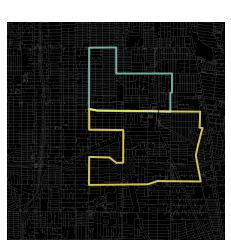

In [17]:
dat = gdf.plot(cmap='Set3', linewidth=2, alpha=0.8, edgecolor='k')
fig, ax = ox.plot_graph(watts_graph, ax=dat, node_size=0, edge_linewidth=0.1,
                        edge_color='gray', show=False, close=False, bbox=bbox)

ax.set_title('New LADOT Dash Circulars')

plt.savefig('figures/new_dash.png', bbox_inches='tight',dpi=400, facecolor='#111111')

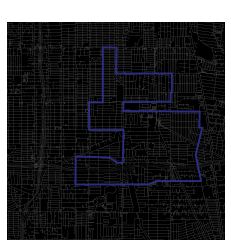

In [19]:
gdf = gpd.read_file('data/old_dash.json')

dat = gdf.plot(cmap='terrain', linewidth=2, alpha=0.8, edgecolor='k')
fig, ax = ox.plot_graph(watts_graph, ax=dat, node_size=0, edge_linewidth=0.1,
                        edge_color='gray', show=False, close=False, bbox=bbox)

ax.set_title('Old LADOT Dash Circular')

plt.savefig('figures/old_dash.png', bbox_inches='tight',dpi=400, facecolor='#111111')